# 💚 Homework 1: KERAS 💚

*Consists of 2 parts*:

1️⃣ Build a Keras Model for **linear regression**. Use the **Boston Housing Dataset** to train & test the model.

2️⃣ Build a Keras Model for **logistic regression**. Use **diabetes.csv** to train & test the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/cherishkim/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


# 📉 Linear Regression

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Attribute Information

*Information taken by calling the* ```.DESCR ``` *property, like so:*
```python
print(boston.DESCR)
```
1. **CRIM** per capita crime rate by town
1. **ZN** proportion of residential land zoned for lots over 25,000 sq. ft
1. **INDUS** proportion of non-retail business acres per town
1. **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
1. **NOX** nitric oxides concentration (parts per 10 million)
1. **RM** average number of rooms per dwelling
1. **AGE** proportion of owner-occupied units built prior to 1940
1. **DIS** weighted distances to five Boston employment centres
1. **RAD** index of accessibility to radial highways
1. **TAX** full-value property-tax rate per \$10,000
1. **PTRATIO** pupil-teacher ratio by town
1. **B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. **LSTAT** % lower status of the population
1. **PRICE** median value of owner-occupied homes (in \$1000's)

### Correlation heatmap:

[Text(0.5, 0, 'CRIM'),
 Text(1.5, 0, 'ZN'),
 Text(2.5, 0, 'INDUS'),
 Text(3.5, 0, 'CHAS'),
 Text(4.5, 0, 'NOX'),
 Text(5.5, 0, 'RM'),
 Text(6.5, 0, 'AGE'),
 Text(7.5, 0, 'DIS'),
 Text(8.5, 0, 'RAD'),
 Text(9.5, 0, 'TAX'),
 Text(10.5, 0, 'PTRATIO'),
 Text(11.5, 0, 'B'),
 Text(12.5, 0, 'LSTAT'),
 Text(13.5, 0, 'PRICE')]

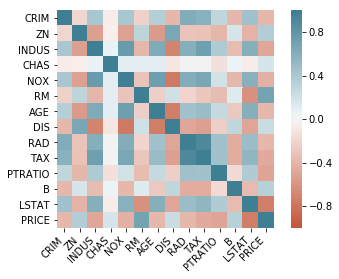

In [3]:
corr = bos.corr()
heat = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [4]:
df = bos.filter(['DIS', 'B', 'LSTAT', 'PRICE'], axis=1)
df.describe()

,DIS,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000
mean,3.795043,356.674032,12.653063,22.532806
std,2.105710,91.294864,7.141062,9.197104
min,1.129600,0.320000,1.730000,5.000000
25%,2.100175,375.377500,6.950000,17.025000
50%,3.207450,391.440000,11.360000,21.200000
75%,5.188425,396.225000,16.955000,25.000000
max,12.126500,396.900000,37.970000,50.000000


In [5]:
features = df.filter(['DIS', 'B', 'LSTAT'], axis=1)
target = df.filter(['PRICE'], axis=1)
X = features.iloc[:,0:13]
y = target.iloc[:,0:13].values

In [7]:
X = MinMaxScaler().fit_transform(X)
y = y.reshape(-1,1)
y = MinMaxScaler().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Neural Network

In [8]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=3))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','accuracy'])
    return regressor

In [9]:
lin_regress = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)

In [10]:
results = lin_regress.fit(X_train, y_train)

Epoch 1/100
354/354 [==============================] - 0s 481us/step - loss: 0.1566 - mean_absolute_error: 0.3523 - acc: 0.0056
Epoch 2/100
354/354 [==============================] - 0s 50us/step - loss: 0.0710 - mean_absolute_error: 0.2054 - acc: 0.0056
Epoch 3/100
354/354 [==============================] - 0s 77us/step - loss: 0.0383 - mean_absolute_error: 0.1286 - acc: 0.0056
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 0.0325 - mean_absolute_error: 0.1277 - acc: 0.0056
Epoch 5/100
354/354 [==============================] - 0s 43us/step - loss: 0.0312 - mean_absolute_error: 0.1306 - acc: 0.0056
Epoch 6/100
354/354 [==============================] - 0s 45us/step - loss: 0.0298 - mean_absolute_error: 0.1271 - acc: 0.0056
Epoch 7/100
354/354 [==============================] - 0s 42us/step - loss: 0.0285 - mean_absolute_error: 0.1232 - acc: 0.0056
Epoch 8/100
354/354 [==============================] - 0s 80us/step - loss: 0.0275 - mean_absolute_error: 0.11

354/354 [==============================] - 0s 89us/step - loss: 0.0185 - mean_absolute_error: 0.1010 - acc: 0.0367
Epoch 66/100
354/354 [==============================] - 0s 66us/step - loss: 0.0185 - mean_absolute_error: 0.1002 - acc: 0.0367
Epoch 67/100
354/354 [==============================] - 0s 73us/step - loss: 0.0187 - mean_absolute_error: 0.0981 - acc: 0.0367
Epoch 68/100
354/354 [==============================] - 0s 52us/step - loss: 0.0184 - mean_absolute_error: 0.1011 - acc: 0.0367
Epoch 69/100
354/354 [==============================] - 0s 60us/step - loss: 0.0186 - mean_absolute_error: 0.1054 - acc: 0.0367
Epoch 70/100
354/354 [==============================] - 0s 101us/step - loss: 0.0187 - mean_absolute_error: 0.0994 - acc: 0.0367
Epoch 71/100
354/354 [==============================] - 0s 93us/step - loss: 0.0184 - mean_absolute_error: 0.0995 - acc: 0.0367
Epoch 72/100
354/354 [==============================] - 0s 93us/step - loss: 0.0183 - mean_absolute_error: 0.1031 - 

### Scikit-learn's ```LinearRegression```

In [11]:
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Now compare

In [12]:
loss, mae, accuracy = build_regressor().evaluate(X_test, y_test, verbose=0)
r2_keras = r2_score(build_regressor().predict(X_test), y_test)

mse_sklearn = mean_squared_error(lin_reg_sklearn.predict(X_test), y_test)
r2_sklearn = r2_score(lin_reg_sklearn.predict(X_test), y_test)

print('Keras MSE: ' + str(loss))
print('Keras R2: ' + str(r2_keras))
print('LinearRegression() MSE: ' + str(mse_sklearn))
print('LinearRegression() R2: ' + str(r2_sklearn))

Keras MSE: 0.5443494225803175
Keras R2: -55.25244198962992
LinearRegression() MSE: 0.01873513806461762
LinearRegression() R2: 0.27233685324536294


### That was with just 3 features. Let's try again with all features.

In [14]:
#get features and target
X = bos.iloc[:,0:13]

#preprocessing
X = MinMaxScaler().fit_transform(X)
y = y.reshape(-1,1)
y = MinMaxScaler().fit_transform(y)

#training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#build Keras NN regressor
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=13))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','accuracy'])
    return regressor

lin_regress = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)

new_results = lin_regress.fit(X_train, y_train)

Epoch 1/100
354/354 [==============================] - 0s 563us/step - loss: 3.1172 - mean_absolute_error: 1.7365 - acc: 0.0000e+00
Epoch 2/100
354/354 [==============================] - 0s 46us/step - loss: 1.8976 - mean_absolute_error: 1.3490 - acc: 0.0000e+00
Epoch 3/100
354/354 [==============================] - 0s 74us/step - loss: 1.0625 - mean_absolute_error: 0.9996 - acc: 0.0000e+00
Epoch 4/100
354/354 [==============================] - 0s 67us/step - loss: 0.5462 - mean_absolute_error: 0.7001 - acc: 0.0028
Epoch 5/100
354/354 [==============================] - 0s 69us/step - loss: 0.2702 - mean_absolute_error: 0.4668 - acc: 0.0056
Epoch 6/100
354/354 [==============================] - 0s 58us/step - loss: 0.1458 - mean_absolute_error: 0.3156 - acc: 0.0141
Epoch 7/100
354/354 [==============================] - 0s 75us/step - loss: 0.0972 - mean_absolute_error: 0.2445 - acc: 0.0141
Epoch 8/100
354/354 [==============================] - 0s 72us/step - loss: 0.0817 - mean_absolute

In [15]:
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train, y_train)

loss, mae, accuracy = build_regressor().evaluate(X_test, y_test, verbose=0)
r2_keras = r2_score(build_regressor().predict(X_test), y_test)

mse_sklearn = mean_squared_error(lin_reg_sklearn.predict(X_test), y_test)
r2_sklearn = r2_score(lin_reg_sklearn.predict(X_test), y_test)

print('Keras MSE: ' + str(loss))
print('Keras R2: ' + str(r2_keras))
print('LinearRegression() MSE: ' + str(mse_sklearn))
print('LinearRegression() R2: ' + str(r2_sklearn))

Keras MSE: 0.18233145773410797
Keras R2: -2.191305125554985
LinearRegression() MSE: 0.013430106551547262
LinearRegression() R2: 0.5291006947760474


### Let's run it again but with a batch size of 50 and 500 epochs!

In [20]:
lin_regress = KerasRegressor(build_fn=build_regressor, batch_size=50, epochs=50)

new_results = lin_regress.fit(X_train, y_train)

Epoch 1/50
354/354 [==============================] - 0s 1ms/step - loss: 0.1450 - mean_absolute_error: 0.3216 - acc: 0.0056
Epoch 2/50
354/354 [==============================] - 0s 48us/step - loss: 0.1033 - mean_absolute_error: 0.2628 - acc: 0.0085
Epoch 3/50
354/354 [==============================] - 0s 77us/step - loss: 0.0894 - mean_absolute_error: 0.2379 - acc: 0.0141
Epoch 4/50
354/354 [==============================] - 0s 82us/step - loss: 0.0748 - mean_absolute_error: 0.2173 - acc: 0.0113
Epoch 5/50
354/354 [==============================] - 0s 113us/step - loss: 0.0638 - mean_absolute_error: 0.1990 - acc: 0.0141
Epoch 6/50
354/354 [==============================] - 0s 86us/step - loss: 0.0574 - mean_absolute_error: 0.1870 - acc: 0.0141
Epoch 7/50
354/354 [==============================] - 0s 87us/step - loss: 0.0523 - mean_absolute_error: 0.1779 - acc: 0.0141
Epoch 8/50
354/354 [==============================] - 0s 61us/step - loss: 0.0486 - mean_absolute_error: 0.1697 - acc:

In [21]:
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train, y_train)

loss, mae, accuracy = build_regressor().evaluate(X_test, y_test, verbose=0)
r2_keras = r2_score(build_regressor().predict(X_test), y_test)

mse_sklearn = mean_squared_error(lin_reg_sklearn.predict(X_test), y_test)
r2_sklearn = r2_score(lin_reg_sklearn.predict(X_test), y_test)

print('Keras MSE: ' + str(loss))
print('Keras R2: ' + str(r2_keras))
print('LinearRegression() MSE: ' + str(mse_sklearn))
print('LinearRegression() R2: ' + str(r2_sklearn))

Keras MSE: 0.8033121667410198
Keras R2: -1.8110482473302536
LinearRegression() MSE: 0.013430106551547262
LinearRegression() R2: 0.5291006947760474


# 📈 Logistic Regression

In [22]:
pima = pd.read_csv('diabetes.csv')
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [23]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
X = pima.drop(columns=['Outcome'])
y = pima[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Neural Network

In [25]:
def model():
    model = Sequential()
    model.add(Dense(units=12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(units=8, init='uniform', activation='relu'))
    model.add(Dense(units=1, init='uniform', activation='sigmoid')) #output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

results = model().fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=1000, batch_size=16)

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.6822 - acc: 0.6476 - val_loss: 0.6599 - val_acc: 0.6771
Epoch 2/1000
576/576 [==============================] - 0s 164us/step - loss: 0.6650 - acc: 0.6424 - val_loss: 0.6400 - val_acc: 0.6771
Epoch 3/1000
576/576 [==============================] - 0s 171us/step - loss: 0.6558 - acc: 0.6493 - val_loss: 0.6300 - val_acc: 0.6823
Epoch 4/1000
576/576 [==============================] - 0s 169us/step - loss: 0.6474 - acc: 0.6493 - val_loss: 0.6308 - val_acc: 0.6979
Epoch 5/1000
576/576 [==============================] - 0s 193us/step - loss: 0.6401 - acc: 0.6510 - val_loss: 0.6112 - val_acc: 0.7031
Epoch 6/1000
576/576 [==============================] - 0s 198us/step - loss: 0.6299 - acc: 0.6510 - val_loss: 0.5959 - val_acc: 0.7188
Epoch 7/1000
576/576 [==============================] - 0s 142us/step - loss: 0.6228 - acc: 0.6562 - val_loss: 0.6117 - val_acc: 0.7135
Epoc

Epoch 120/1000
576/576 [==============================] - 0s 200us/step - loss: 0.4835 - acc: 0.7656 - val_loss: 0.5080 - val_acc: 0.7760
Epoch 121/1000
576/576 [==============================] - 0s 160us/step - loss: 0.4845 - acc: 0.7656 - val_loss: 0.5041 - val_acc: 0.7812
Epoch 122/1000
576/576 [==============================] - 0s 152us/step - loss: 0.4860 - acc: 0.7639 - val_loss: 0.5073 - val_acc: 0.7448
Epoch 123/1000
576/576 [==============================] - 0s 145us/step - loss: 0.4775 - acc: 0.7778 - val_loss: 0.5138 - val_acc: 0.7500
Epoch 124/1000
576/576 [==============================] - 0s 169us/step - loss: 0.4965 - acc: 0.7778 - val_loss: 0.5311 - val_acc: 0.7031
Epoch 125/1000
576/576 [==============================] - 0s 235us/step - loss: 0.4784 - acc: 0.7795 - val_loss: 0.5186 - val_acc: 0.7344
Epoch 126/1000
576/576 [==============================] - 0s 228us/step - loss: 0.4946 - acc: 0.7535 - val_loss: 0.5096 - val_acc: 0.7396
Epoch 127/1000
576/576 [==========

576/576 [==============================] - 0s 168us/step - loss: 0.4250 - acc: 0.8056 - val_loss: 0.5008 - val_acc: 0.7656
Epoch 239/1000
576/576 [==============================] - 0s 180us/step - loss: 0.4299 - acc: 0.8073 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 240/1000
576/576 [==============================] - 0s 115us/step - loss: 0.4280 - acc: 0.8021 - val_loss: 0.5022 - val_acc: 0.7708
Epoch 241/1000
576/576 [==============================] - 0s 147us/step - loss: 0.4241 - acc: 0.7986 - val_loss: 0.4965 - val_acc: 0.7656
Epoch 242/1000
576/576 [==============================] - 0s 205us/step - loss: 0.4339 - acc: 0.7986 - val_loss: 0.5373 - val_acc: 0.7552
Epoch 243/1000
576/576 [==============================] - 0s 189us/step - loss: 0.4239 - acc: 0.8056 - val_loss: 0.4961 - val_acc: 0.7604
Epoch 244/1000
576/576 [==============================] - 0s 173us/step - loss: 0.4243 - acc: 0.8056 - val_loss: 0.4985 - val_acc: 0.7604
Epoch 245/1000
576/576 [=========================

576/576 [==============================] - 0s 161us/step - loss: 0.4018 - acc: 0.8212 - val_loss: 0.5249 - val_acc: 0.7552
Epoch 357/1000
576/576 [==============================] - 0s 146us/step - loss: 0.4079 - acc: 0.8125 - val_loss: 0.5104 - val_acc: 0.7656
Epoch 358/1000
576/576 [==============================] - 0s 167us/step - loss: 0.4034 - acc: 0.8177 - val_loss: 0.5155 - val_acc: 0.7500
Epoch 359/1000
576/576 [==============================] - 0s 152us/step - loss: 0.4028 - acc: 0.8125 - val_loss: 0.5138 - val_acc: 0.7396
Epoch 360/1000
576/576 [==============================] - 0s 172us/step - loss: 0.4019 - acc: 0.8247 - val_loss: 0.4973 - val_acc: 0.7656
Epoch 361/1000
576/576 [==============================] - 0s 130us/step - loss: 0.4005 - acc: 0.8264 - val_loss: 0.5045 - val_acc: 0.7604
Epoch 362/1000
576/576 [==============================] - 0s 117us/step - loss: 0.4053 - acc: 0.8281 - val_loss: 0.4980 - val_acc: 0.7708
Epoch 363/1000
576/576 [=========================

576/576 [==============================] - 0s 149us/step - loss: 0.4037 - acc: 0.8316 - val_loss: 0.5095 - val_acc: 0.7448
Epoch 475/1000
576/576 [==============================] - 0s 159us/step - loss: 0.4005 - acc: 0.8247 - val_loss: 0.5122 - val_acc: 0.7500
Epoch 476/1000
576/576 [==============================] - 0s 132us/step - loss: 0.3961 - acc: 0.8229 - val_loss: 0.5244 - val_acc: 0.7604
Epoch 477/1000
576/576 [==============================] - 0s 183us/step - loss: 0.3889 - acc: 0.8403 - val_loss: 0.5076 - val_acc: 0.7656
Epoch 478/1000
576/576 [==============================] - 0s 190us/step - loss: 0.3949 - acc: 0.8247 - val_loss: 0.5144 - val_acc: 0.7552
Epoch 479/1000
576/576 [==============================] - 0s 143us/step - loss: 0.3837 - acc: 0.8385 - val_loss: 0.5132 - val_acc: 0.7552
Epoch 480/1000
576/576 [==============================] - 0s 121us/step - loss: 0.3889 - acc: 0.8368 - val_loss: 0.5201 - val_acc: 0.7604
Epoch 481/1000
576/576 [=========================

576/576 [==============================] - 0s 153us/step - loss: 0.3819 - acc: 0.8420 - val_loss: 0.5266 - val_acc: 0.7656
Epoch 593/1000
576/576 [==============================] - 0s 158us/step - loss: 0.3796 - acc: 0.8316 - val_loss: 0.5436 - val_acc: 0.7604
Epoch 594/1000
576/576 [==============================] - 0s 116us/step - loss: 0.3813 - acc: 0.8281 - val_loss: 0.5263 - val_acc: 0.7604
Epoch 595/1000
576/576 [==============================] - 0s 111us/step - loss: 0.3863 - acc: 0.8229 - val_loss: 0.5243 - val_acc: 0.7604
Epoch 596/1000
576/576 [==============================] - 0s 113us/step - loss: 0.3752 - acc: 0.8351 - val_loss: 0.5194 - val_acc: 0.7708
Epoch 597/1000
576/576 [==============================] - 0s 116us/step - loss: 0.3760 - acc: 0.8420 - val_loss: 0.5160 - val_acc: 0.7656
Epoch 598/1000
576/576 [==============================] - 0s 157us/step - loss: 0.3833 - acc: 0.8385 - val_loss: 0.5532 - val_acc: 0.7760
Epoch 599/1000
576/576 [=========================

576/576 [==============================] - 0s 164us/step - loss: 0.3766 - acc: 0.8299 - val_loss: 0.5226 - val_acc: 0.7708
Epoch 711/1000
576/576 [==============================] - 0s 185us/step - loss: 0.3719 - acc: 0.8385 - val_loss: 0.5686 - val_acc: 0.7708
Epoch 712/1000
576/576 [==============================] - 0s 172us/step - loss: 0.3995 - acc: 0.8177 - val_loss: 0.5593 - val_acc: 0.7604
Epoch 713/1000
576/576 [==============================] - 0s 188us/step - loss: 0.3848 - acc: 0.8385 - val_loss: 0.5686 - val_acc: 0.7708
Epoch 714/1000
576/576 [==============================] - 0s 169us/step - loss: 0.3911 - acc: 0.8264 - val_loss: 0.5230 - val_acc: 0.7656
Epoch 715/1000
576/576 [==============================] - 0s 193us/step - loss: 0.3952 - acc: 0.8247 - val_loss: 0.5226 - val_acc: 0.7604
Epoch 716/1000
576/576 [==============================] - 0s 261us/step - loss: 0.3905 - acc: 0.8351 - val_loss: 0.5427 - val_acc: 0.7552
Epoch 717/1000
576/576 [=========================

576/576 [==============================] - 0s 120us/step - loss: 0.3675 - acc: 0.8438 - val_loss: 0.5247 - val_acc: 0.7708
Epoch 829/1000
576/576 [==============================] - 0s 191us/step - loss: 0.3860 - acc: 0.8212 - val_loss: 0.5549 - val_acc: 0.7604
Epoch 830/1000
576/576 [==============================] - 0s 276us/step - loss: 0.3893 - acc: 0.8247 - val_loss: 0.5547 - val_acc: 0.7604
Epoch 831/1000
576/576 [==============================] - 0s 194us/step - loss: 0.3964 - acc: 0.8438 - val_loss: 0.5336 - val_acc: 0.7656
Epoch 832/1000
576/576 [==============================] - 0s 133us/step - loss: 0.3754 - acc: 0.8247 - val_loss: 0.5377 - val_acc: 0.7708
Epoch 833/1000
576/576 [==============================] - 0s 117us/step - loss: 0.3823 - acc: 0.8316 - val_loss: 0.5426 - val_acc: 0.7708
Epoch 834/1000
576/576 [==============================] - 0s 147us/step - loss: 0.3751 - acc: 0.8368 - val_loss: 0.5399 - val_acc: 0.7708
Epoch 835/1000
576/576 [=========================

576/576 [==============================] - 0s 157us/step - loss: 0.3689 - acc: 0.8420 - val_loss: 0.5553 - val_acc: 0.7656
Epoch 947/1000
576/576 [==============================] - 0s 160us/step - loss: 0.3642 - acc: 0.8507 - val_loss: 0.5183 - val_acc: 0.7656
Epoch 948/1000
576/576 [==============================] - 0s 185us/step - loss: 0.3735 - acc: 0.8351 - val_loss: 0.5306 - val_acc: 0.7656
Epoch 949/1000
576/576 [==============================] - 0s 210us/step - loss: 0.3682 - acc: 0.8333 - val_loss: 0.5748 - val_acc: 0.7500
Epoch 950/1000
576/576 [==============================] - 0s 188us/step - loss: 0.3923 - acc: 0.8212 - val_loss: 0.5441 - val_acc: 0.7760
Epoch 951/1000
576/576 [==============================] - 0s 171us/step - loss: 0.3745 - acc: 0.8420 - val_loss: 0.5225 - val_acc: 0.7708
Epoch 952/1000
576/576 [==============================] - 0s 237us/step - loss: 0.3826 - acc: 0.8385 - val_loss: 0.5514 - val_acc: 0.7552
Epoch 953/1000
576/576 [=========================

### scikit-learn's ```LogisticRegression```

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)
print('predicted y-values:')
print(y_pred)
print('actual y-values:')
print(y_test.values.T)

predicted y-values:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]
actual y-values:
[[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0
  0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
  1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
  1 1 0 1 1 0 1 1 1 0 0 0]]


### And now we compare

In [28]:
y_truth = y_test.values.T

#from NN
loss, accuracy = model().evaluate(X_test, y_test, verbose=0)

#from sklearn
acc_sklearn = accuracy_score(logreg.predict(X_test), y_test)

print('Keras accuracy:')
print(accuracy)
print('LogarithmicRegression() accuracy:')
print(acc_sklearn)

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/cherishkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """


Keras accuracy:
0.6770833333333334
LogarithmicRegression() accuracy:
0.8072916666666666
